In [1]:
import tensorflow as tf
import numpy as np
import xlrd
import os

In [2]:
data_file = "fire_theft.xls"
book = xlrd.open_workbook(data_file, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
num_samples = sheet.nrows-1

In [3]:
tf.app.flags.DEFINE_string(
    "log_dir", os.path.join(os.path.dirname(os.path.abspath('__file__')), "logs"),
    "Directory where event logs are written to.")
tf.app.flags.DEFINE_string(
    "f", "", "kernel")
tf.app.flags.DEFINE_integer("num_epochs", 10, "The number of epochs for training the model, default is 10")
FLAGS = tf.app.flags.FLAGS

In [4]:
W = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

In [5]:
def inputs():
    X = tf.placeholder(tf.float32, name="X")
    Y = tf.placeholder(tf.float32, name="Y")
    return X, Y

In [6]:
def inference(X):
    return X*W+b

In [7]:
def loss(X, Y):
    Y_predicted = inference(X)
    return tf.squared_difference(Y, Y_predicted)

In [8]:
def train(loss):
    learning_rate = 0.001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(os.path.expanduser(FLAGS.log_dir), sess.graph)
    
    X, Y = inputs()
    
    train_loss = loss(X, Y)
    train_op = train(train_loss)
    
    for epoch_num in range(FLAGS.num_epochs):
        for x, y in data:
            train_op = train(train_loss)
            loss_value, _ = sess.run([train_loss, train_op], feed_dict={X:x, Y:y})
            
        print("epoch %d, loss=%f"%(epoch_num+1, loss_value))
        wcoeff, bias =sess.run([W,b])        

epoch %d, loss=%f (1, 16.05426)
epoch %d, loss=%f (2, 13.996817)
epoch %d, loss=%f (3, 12.129507)
epoch %d, loss=%f (4, 10.440162)
epoch %d, loss=%f (5, 8.9173355)
epoch %d, loss=%f (6, 7.550231)
epoch %d, loss=%f (7, 6.3286476)
epoch %d, loss=%f (8, 5.242986)
epoch %d, loss=%f (9, 4.2842355)
epoch %d, loss=%f (10, 3.4438615)


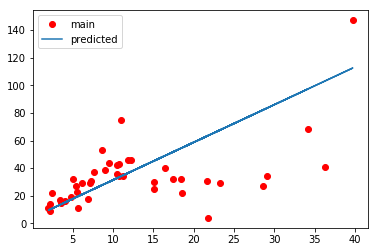

In [11]:
import matplotlib.pyplot as plt
x_val = data[:,0]
labels = data[:, 1]
prediction_val = x_val * wcoeff + bias

plt.plot(x_val, labels, "ro", label="main")
plt.plot(x_val, prediction_val, label="predicted")
plt.legend()
plt.show()
writer.close()